**INTRODUCTION**
* HR analytics dataset
* Dataset is related to company's employees and all important thing about employee
* Goal of the dataset to find that reason, why employees leaved the job or what is the main reason that employees leave  the job and find that reasons(that represent 'features' in the dataset) 
  
* This dataset contain ten features/columns 
* All columns have give some specific information about employees. eg=  employees's satisfaction, employee monthly average    spent time in company, employees's salary, employees's promotion, employees's work accident , ..
  
* In this dataset target_attribute is 'Attrition' and this is classification problem

In [1]:
# IMPORT SOME NECESSARY LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Load the dataset
hr= pd.read_csv('HR-Employee-Attrition.csv')

In [4]:
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
hr.shape  # dataset  shape in rows & columns

(1470, 35)

In [6]:
hr['Attrition'].value_counts()   #  dataset is imbalanced

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
# change the value of  'Attrition' into  (0 & 1 )
hr['Attrition']= hr['Attrition'].map({'No':0,'Yes':1})

In [8]:

hr.isnull().sum()  #  have no null value in this dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
hr.info()        # brief summary of dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
hr.describe()    # statistical  description

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean         2.729932  ...                  2.712245           80.0   
std          0.711561  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%          2.000000  ...                  2.000000           80.0   
50%          3.000000  ...                  3.000000           80.0   
75%          3.000000  ...                  4.000000           80.0   
max          4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 27 columns]

**LET'S DO EDA OVER THIS DATASET**

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

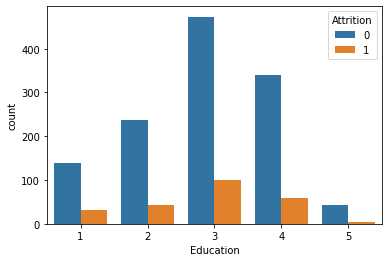

In [16]:
# plotting countplot of 'Education'  to see that how many types value is in this feature

print(hr.Education.value_counts())   # 5 diiferent types value in 'Education'  , maximum number = 5, minimum number = 3,4,2,1
sns.countplot(hr['Education'], hue= hr['Attrition'])  # 
# few employee are higher educated 
#

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:xlabel='Department', ylabel='count'>

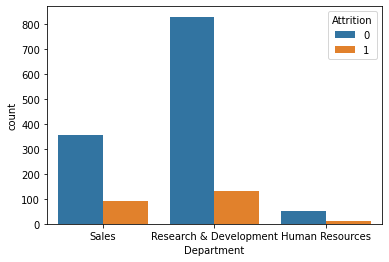

In [13]:
# plotting countplot of 'Department'  

print(hr.Department.value_counts())       #  3 types of value in  'Department' &  minimum number= human resources
sns.countplot(hr['Department'], data=hr, hue='Attrition')   


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

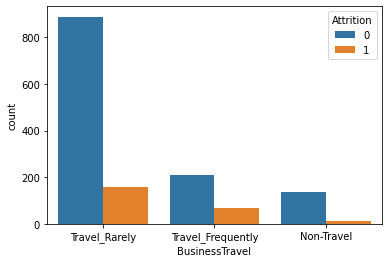

In [14]:
# plotting countplot of 'BusinessTravel'  
print(hr.BusinessTravel.value_counts())               #  3 types of value in  'BusinessTravel' 
sns.countplot(hr['BusinessTravel'], data=hr, hue='Attrition')            
#
# 

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

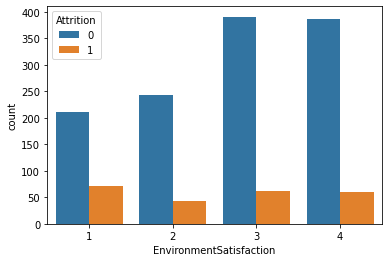

In [17]:
# plotting countplot  of  'EnvironmentSatisfaction'  to see that how many types value is in this feature

print(hr.EnvironmentSatisfaction.value_counts())         #  4 types of value in  'EnvironmentSatisfaction'  
sns.countplot('EnvironmentSatisfaction', data=hr, hue='Attrition')                            
#
# 'Attrition' yes has less distributed in 'EnvronmentStisfaction' equal to 3 or 4
# whose 'Envoronmentsatisfaction' equal to 3 or 4 then more chances to 'Attrition' NO

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

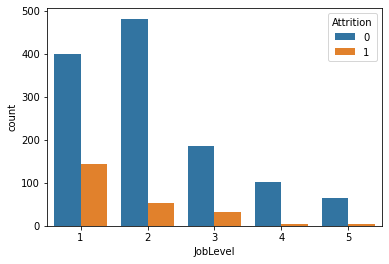

In [18]:
# plotting countplot  of   'JobLevel'   to see that how many types value is in this feature

print(hr.JobLevel.value_counts())       #  5 types of value in  'JobLevel'  
sns.countplot('JobLevel',data=hr, hue='Attrition')           

# employees who related 'Joblevel'=1 those higher 'Attrition' rate is Yes
#  emploees who related to Joblevel two those minimum 'Attrition' Yes    

Male      882
Female    588
Name: Gender, dtype: int64


<AxesSubplot:xlabel='EducationField', ylabel='count'>

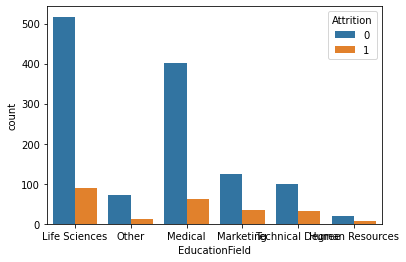

In [19]:
# plotting countplot  of 'Gender'   to see that how many types value is in this feature

print(hr.Gender.value_counts())       #  2 types of value in  'Gender'  
sns.countplot('EducationField',data=hr, hue='Attrition')   
##     'Female' & 'Male' both have equally 'Attrition' rate yes       

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<AxesSubplot:xlabel='EducationField', ylabel='count'>

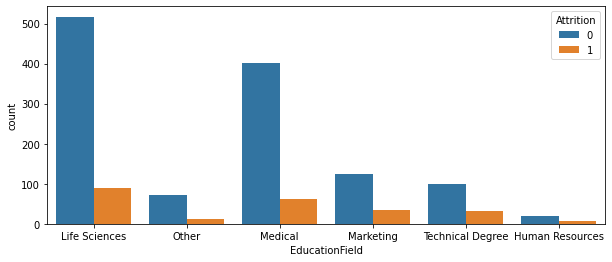

In [20]:
# plotting countplot  of   'EducationField'  to see that how many types value is in this feature

plt.figure(figsize=(10,4))
print(hr.EducationField.value_counts())       #  6 types of value in  'EducationField'  
sns.countplot('EducationField',data=hr, hue='Attrition')  
#   employees who related 'Life science' his less 'Attrition' rate Yes 


<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

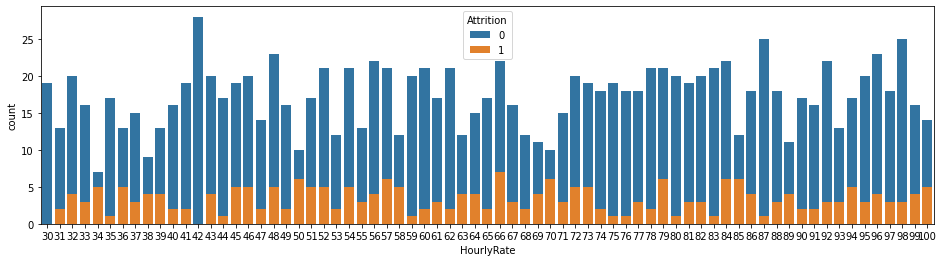

In [21]:
# plotting countplot  of   'HourlyRate'  to see that how many types value is in this feature

plt.figure(figsize=(16,4)) 
sns.countplot('HourlyRate', data=hr, hue='Attrition', dodge=False)  


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


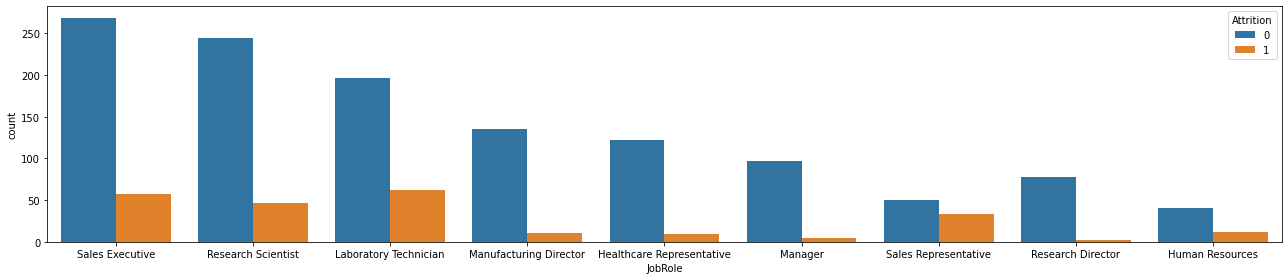

In [22]:
# plotting countplot  of   'JobRole'  to see that how many types value is in this feature

plt.figure(figsize=(18,4))
print(hr.JobRole.value_counts())       #  9 types of value in  'JobRole'  
sns.countplot('JobRole',data=hr, hue='Attrition') 
plt.tight_layout()                               
# 'sales executive','research scientist'& 'laboratory tech' are higher distribution 

# Sales Executive, Laboratory Technician, Sales Representative, Human Resources these all features are high
#      'Attrition' rate ' yes

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


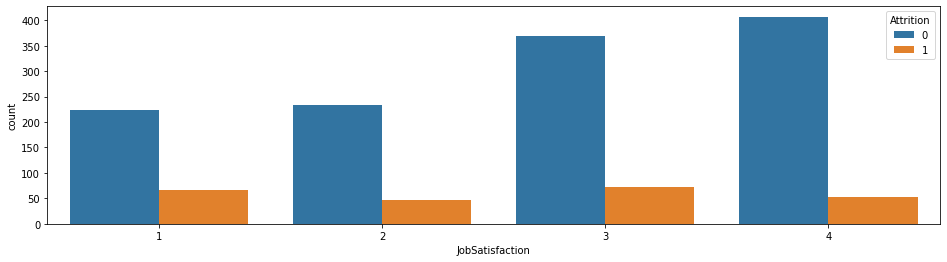

In [23]:
# plotting countplot  of   'JobSatisfaction'  to see that how many types value is in this feature

plt.figure(figsize=(16,4))
print(hr.JobSatisfaction.value_counts())       #    
sns.countplot('JobSatisfaction',data=hr, hue='Attrition') 
plt.show()
# in JobSatisfaction equal to 4  those employees less 'Attrition' yes 

In [24]:
# 'MaritalStatus'  to see that how many types value is in this feature


print(hr.MaritalStatus.value_counts())       #  maximum employees are married   


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

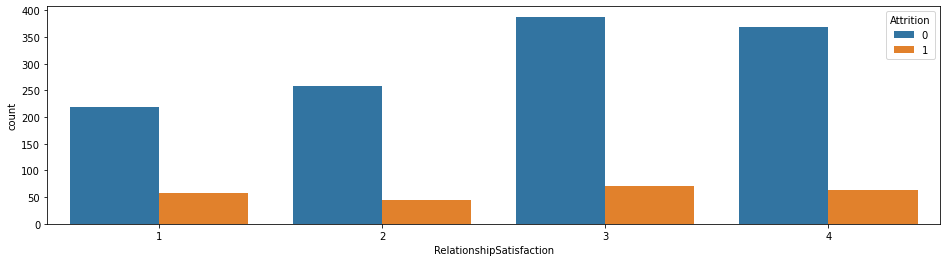

In [25]:
# plotting countplot  of   'RelationshipSatisfaction'  to see that how many types value is in this feature

plt.figure(figsize=(16,4))
print(hr.RelationshipSatisfaction.value_counts())       #    
sns.countplot('RelationshipSatisfaction', data=hr, hue='Attrition') 
# employees whose 'RelationSatisfaction' less his more probability to 'Attrition' yes

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

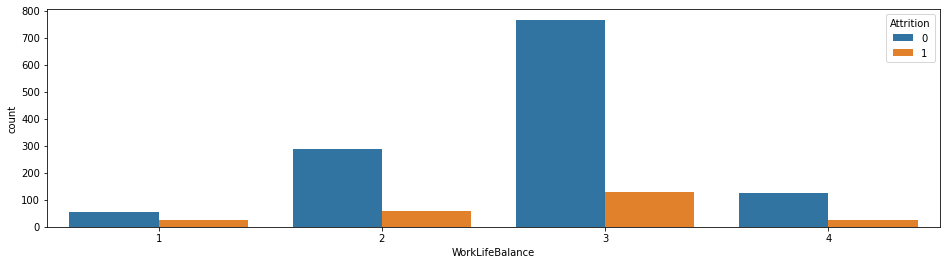

In [26]:
# plotting countplot  of   'WorkLifeBalance'  to see that how many types value is in this feature

plt.figure(figsize=(16,4))
print(hr.WorkLifeBalance.value_counts())              #  minimum number of value is 1 & 4    
sns.countplot('WorkLifeBalance',data=hr, hue='Attrition')   

#  'WorklifeBalance' is equal to 3 or 4 then less 'Attrition' distributed 
# whose 'WorklifeBalance ' has less his more probability to 'Attrition' yes

3    1244
4     226
Name: PerformanceRating, dtype: int64


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

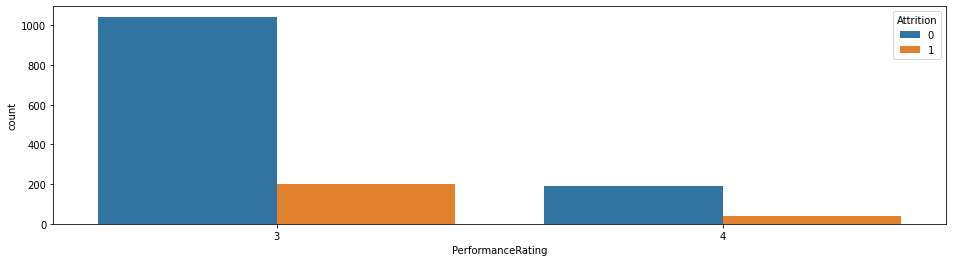

In [27]:
# plotting countplot  of   'PerformanceRating'  to see that how many types value is in this feature

plt.figure(figsize=(16,4))
print(hr.PerformanceRating.value_counts())
sns.countplot('PerformanceRating', data=hr, hue='Attrition')   


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

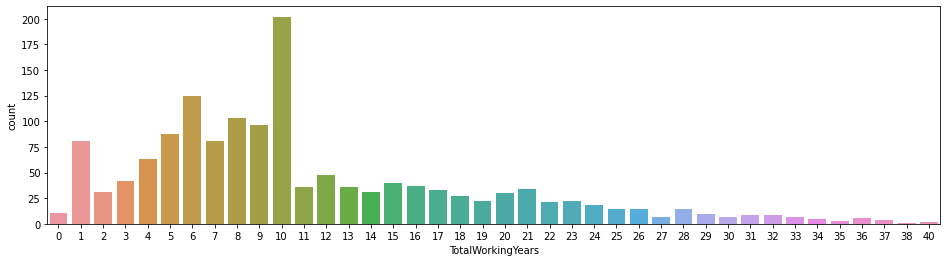

In [28]:
# plotting countplot  of   'TotalWorkingYears'  to see that how many types value is in this feature

plt.figure(figsize=(16,4))
#print(hr.TotalWorkingYears.value_counts())       #  maximum employees workingyears range (1 to 12)    
sns.countplot(hr['TotalWorkingYears'])  

In [381]:
hr.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Figure size 2880x2880 with 0 Axes>

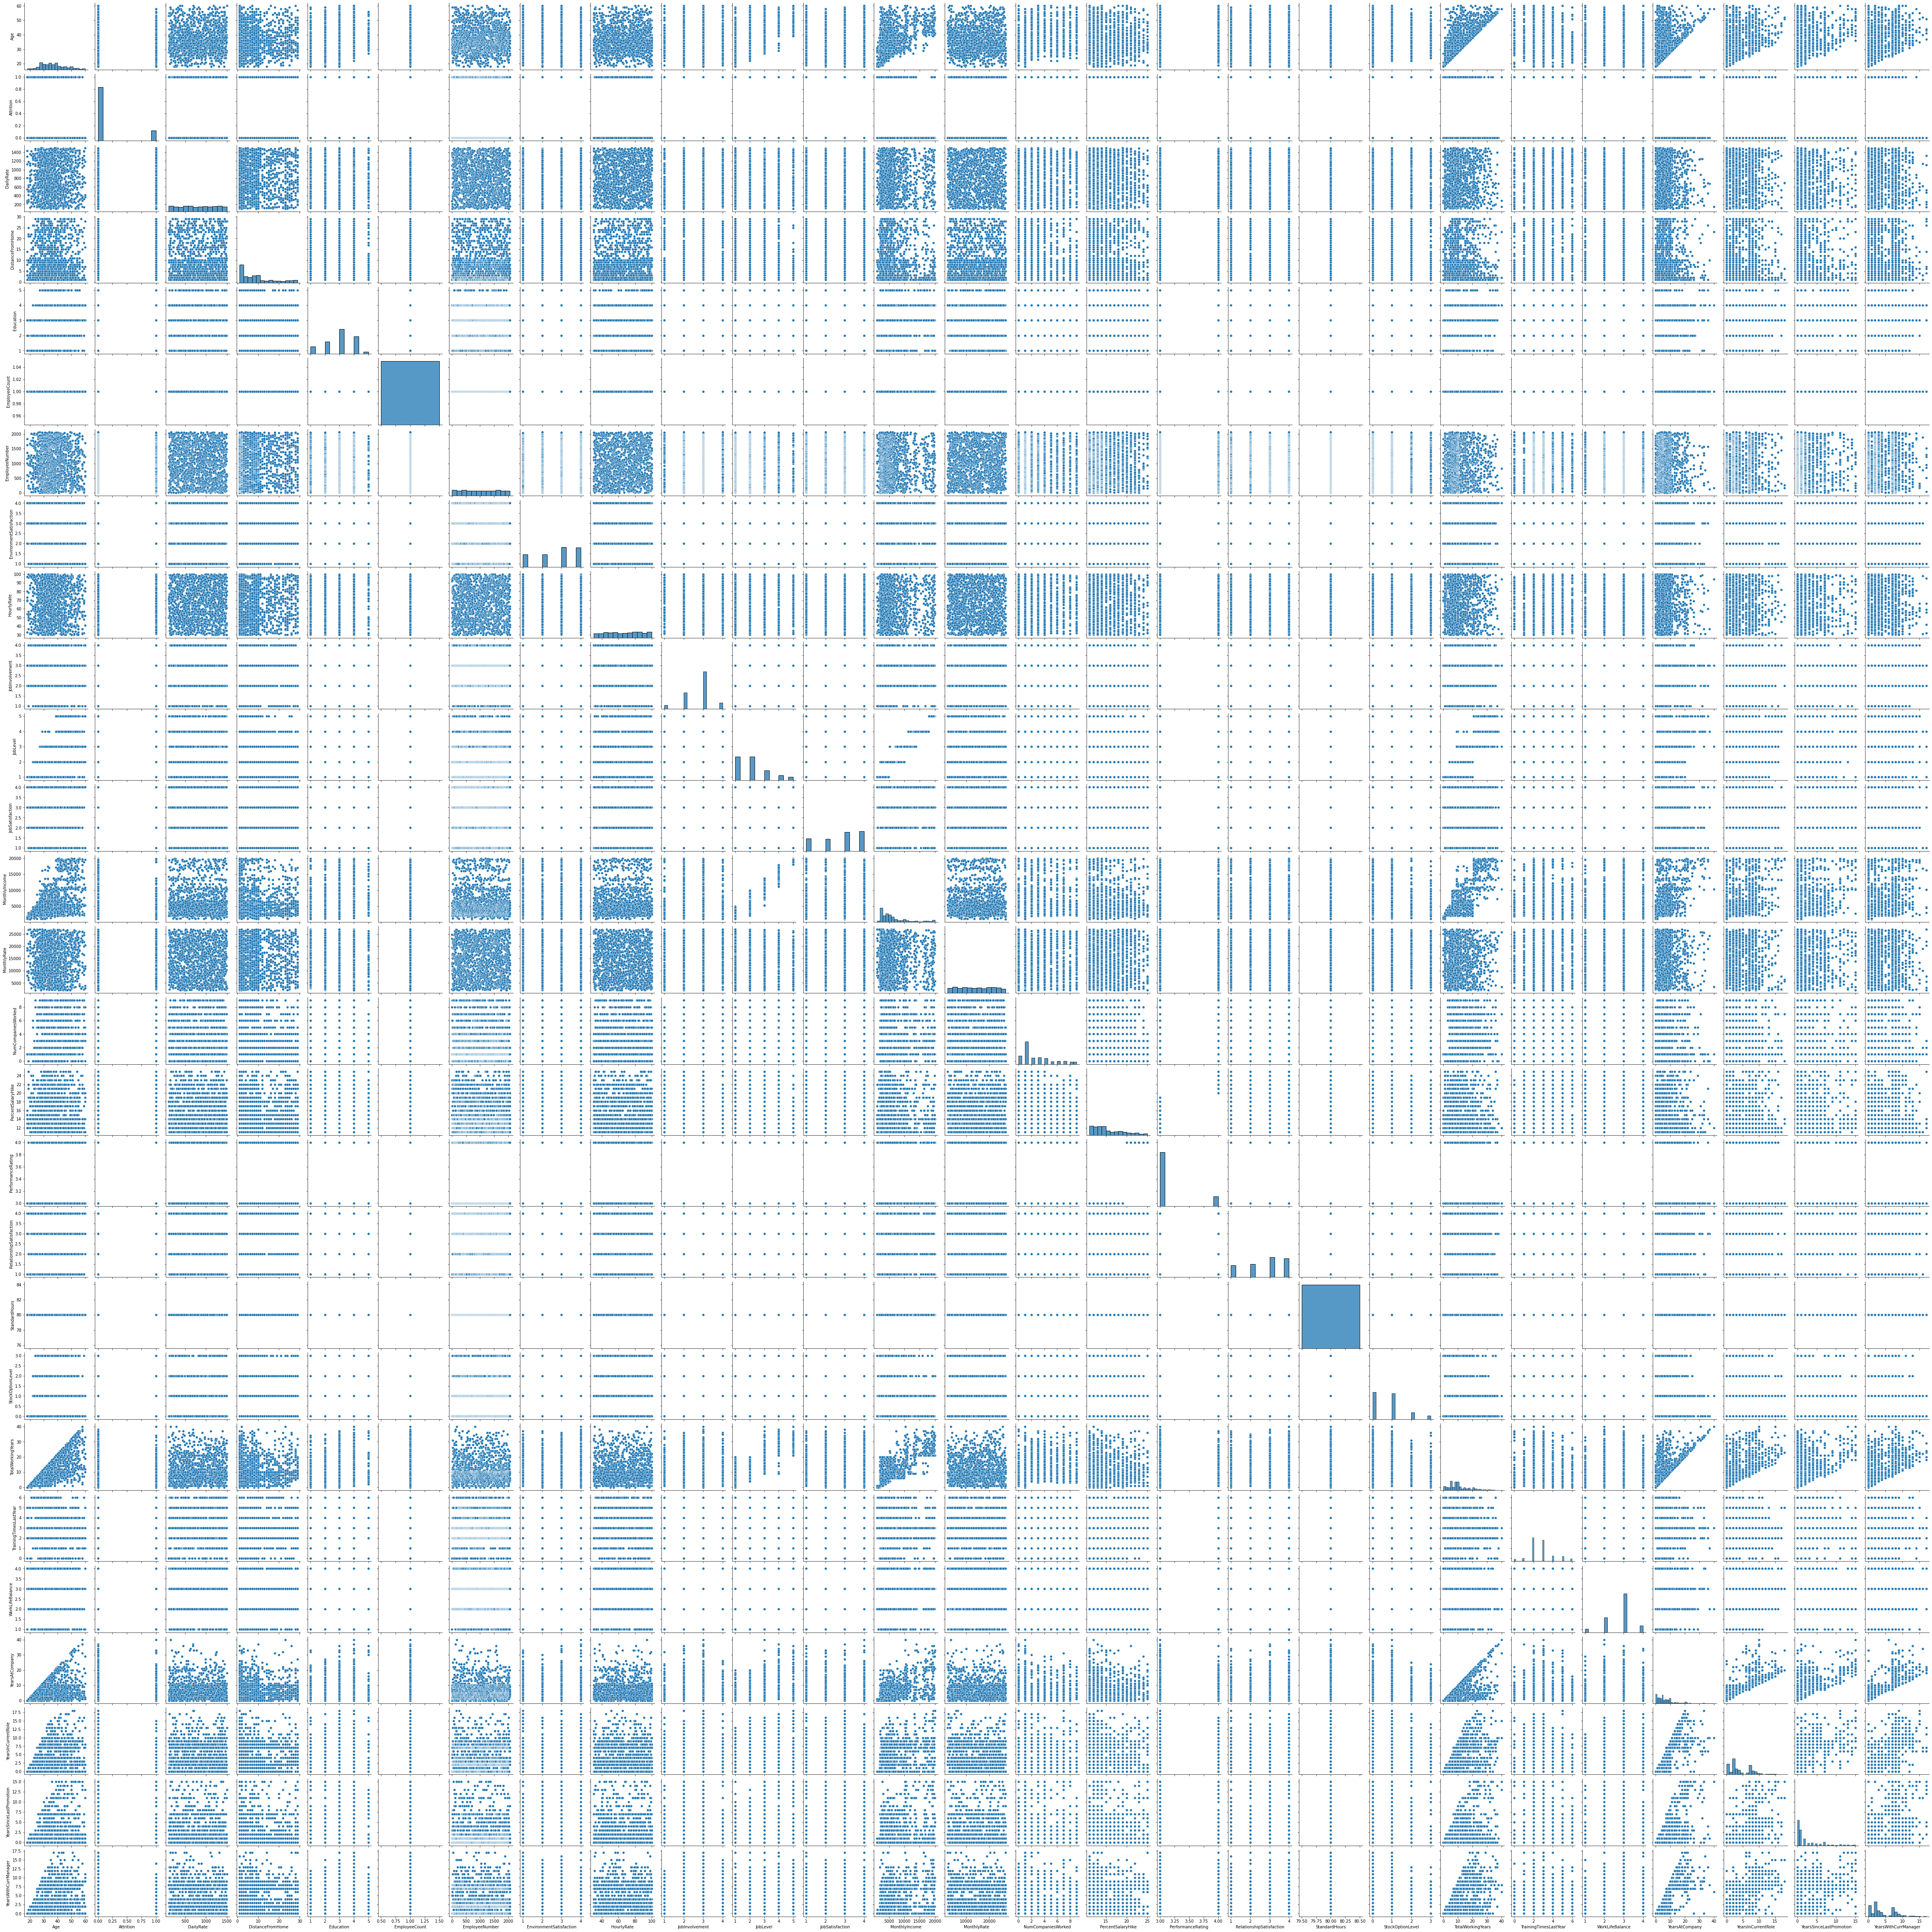

In [29]:
#plotting pairplot
plt.figure(figsize=(40,40))
sns.pairplot(hr)
plt.savefig('hr_pairplot.jpg')


<AxesSubplot:>

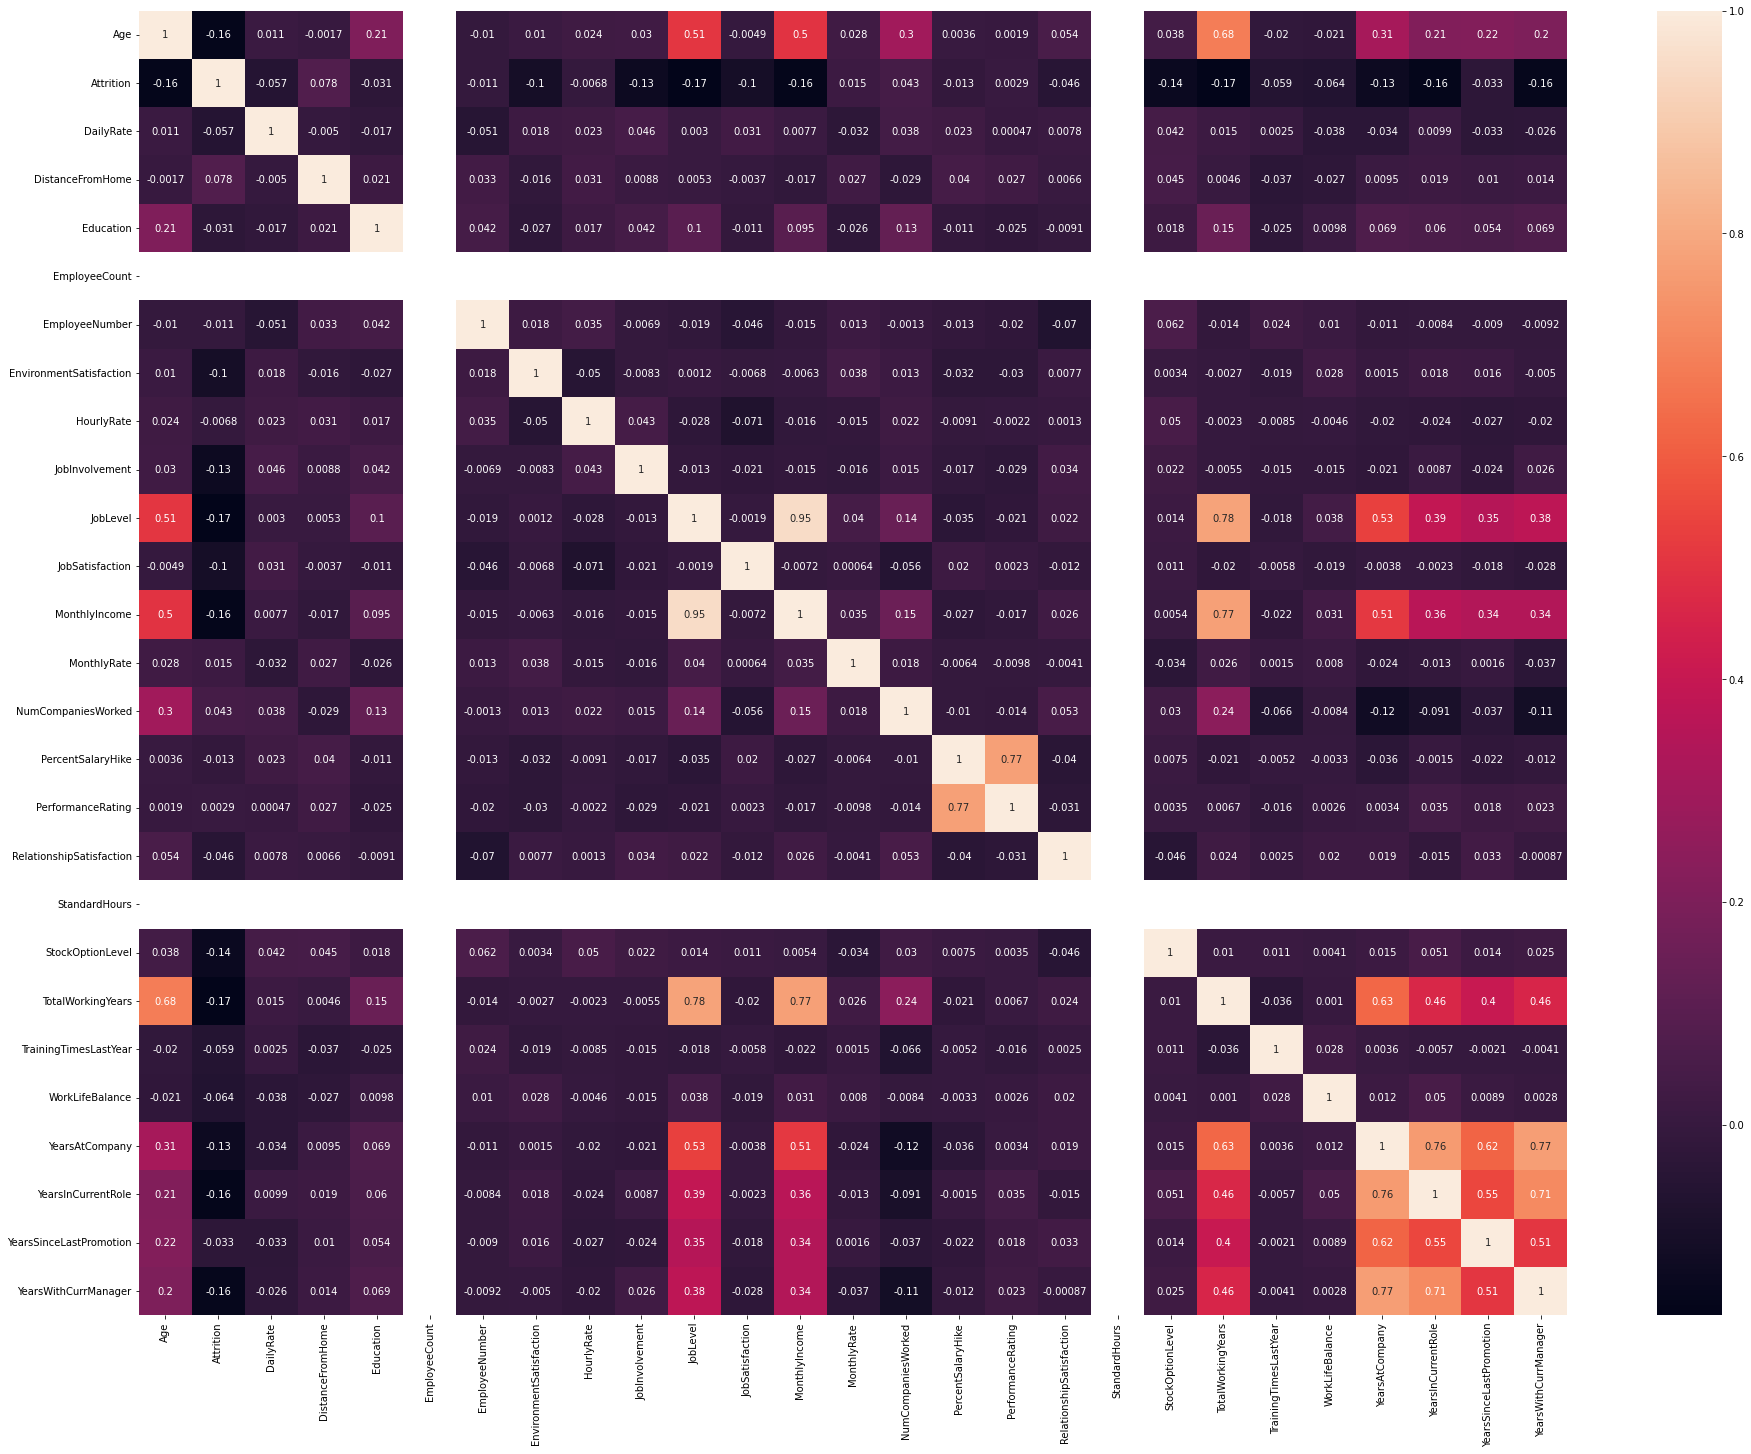

In [30]:
#plotting correlation through  heatmap

plt.figure(figsize=(32,24))
sns.heatmap(hr.corr(), annot=True)

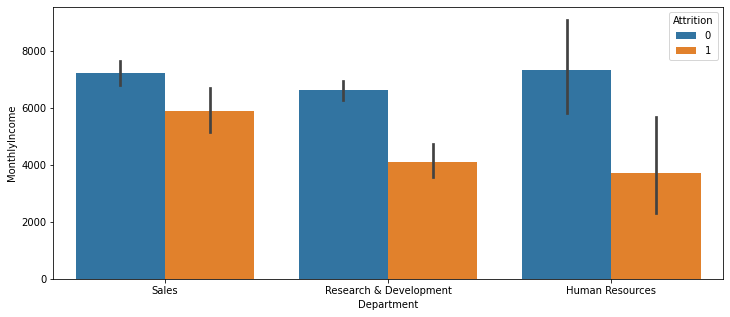

In [46]:
#
plt.figure(figsize=(12,5))
sns.barplot( 'Department', 'MonthlyIncome',  data=hr,hue='Attrition')
plt.show()
# shown in this plot higher monthlyincome paid employees from all 'department' are very less probability 
#      to left('Attrition'=yes) the job
# in 'Sales' higher 'Attrition ' rate Yes , sales related employees higher probability to left the job

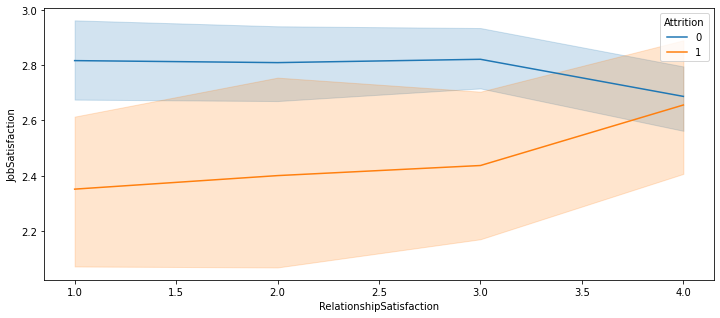

In [35]:
#
plt.figure(figsize=(12,5))
sns.lineplot('RelationshipSatisfaction','JobSatisfaction',  data=hr, hue='Attrition')
plt.show()
# 

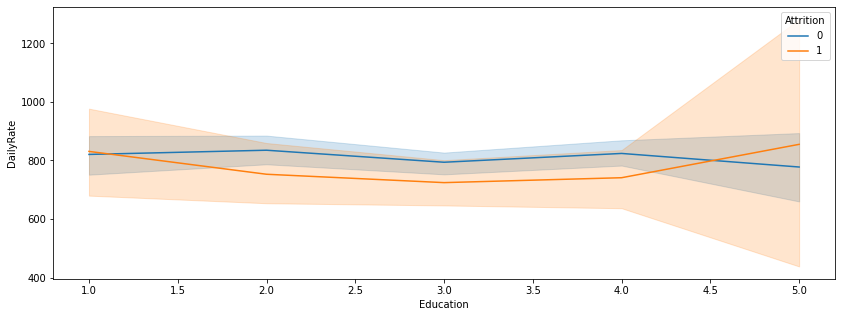

In [36]:
#   plotting 'DailyRate' vs 'Education' 
plt.figure(figsize=(14,5))
sns.lineplot( 'Education','DailyRate',  data=hr, hue='Attrition')
plt.show()
# in 'DailyRate' with 'Education' equally distributed 'Attrition' yes/No
# 

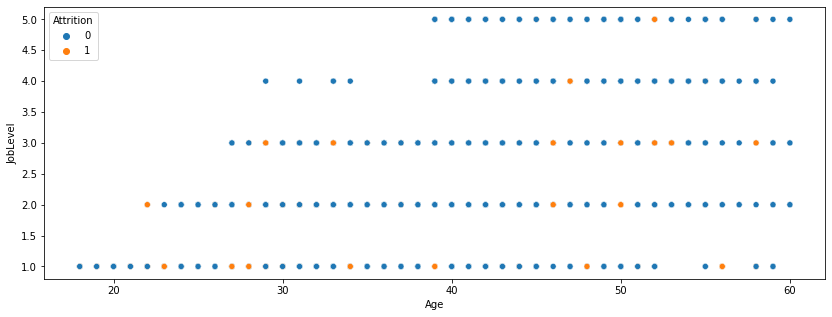

In [37]:
#   plotting 'Age' vs 'JobLevel' 

plt.figure(figsize=(14,5))
sns.scatterplot( 'Age','JobLevel',  data=hr, hue='Attrition')
plt.show()
# employees whose joblevel is higher those age greater than 40
# higher 'JobLevel' employee less probability to left the job

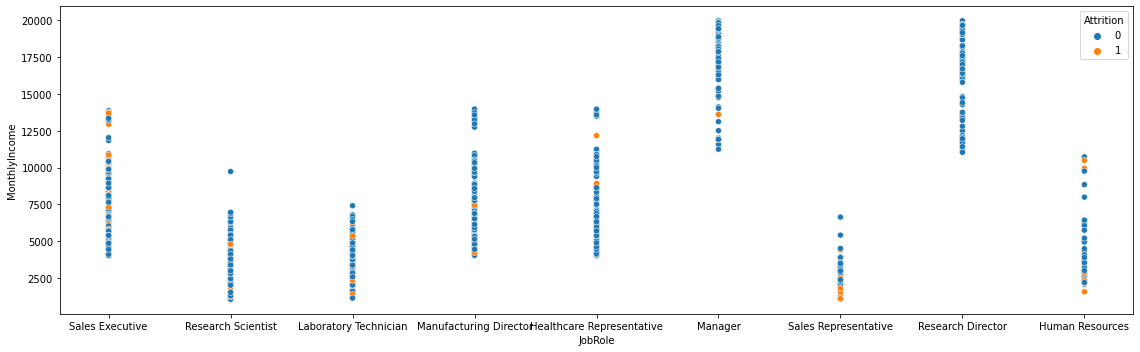

In [38]:
#   plotting 'JobRole' vs 'MonthlyIncome' 
plt.figure(figsize=(16,5))
sns.scatterplot('JobRole','MonthlyIncome',  data=hr, hue='Attrition')
plt.tight_layout()
# employees who related 'manager' & 'ResearchDirector' those mothlyincome is higher then less chances to 
#       employeesleft from company

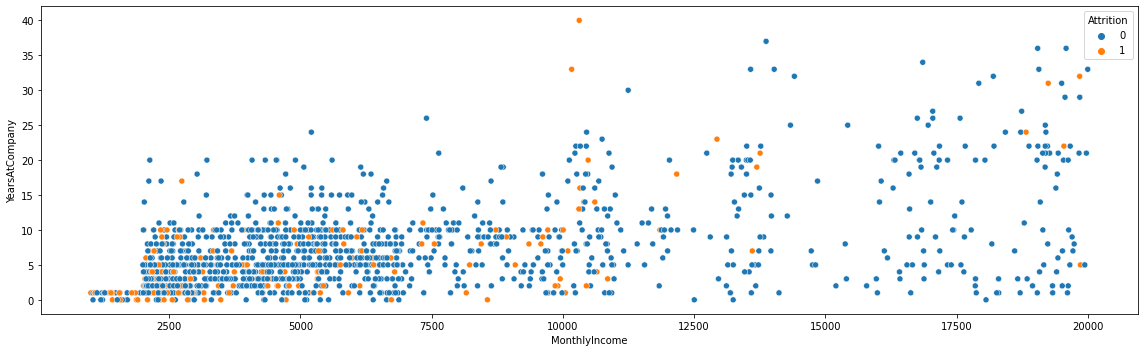

In [39]:
#   plotting 'MonthlyIncome' vs 'YearsAtCompany' 
plt.figure(figsize=(16,5))
sns.scatterplot('MonthlyIncome','YearsAtCompany',  data=hr, hue='Attrition')
plt.tight_layout()
# employees whose monthlyincome less than 10000 then employees spent less times in 'Yearsatcompany'
# less monthlyincome paid employees that employees higher 'Attrition' rate yes

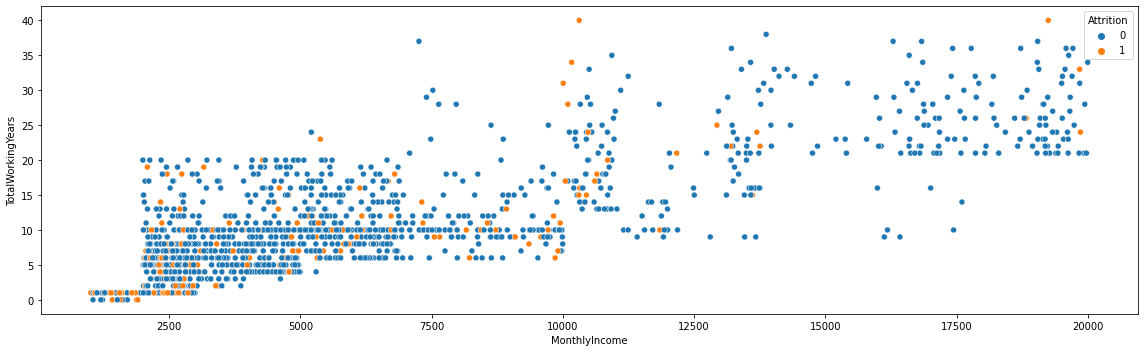

In [40]:
#   plotting 'MonthlyIncome' vs 'TotalWorkingYears' 
plt.figure(figsize=(16,5))
sns.scatterplot('MonthlyIncome', 'TotalWorkingYears', data=hr, hue='Attrition')
plt.tight_layout()
#  employees whose workingyears is high his monthly income has also increase
# employees whose  less monthlyincome & less workingYears his higher 'Attrition' rate yes 

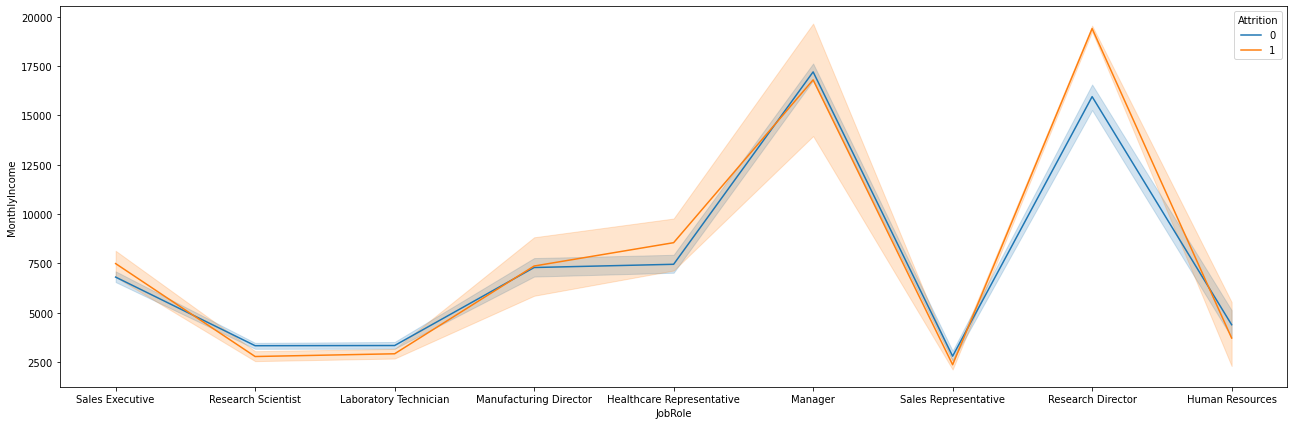

In [43]:
# plotting lineplot 
plt.figure(figsize=(22,7))
sns.lineplot('JobRole','MonthlyIncome', data=hr, hue='Attrition')
plt.show()
# who related to manager or Research_director his higher monthlyincome compare to another Joblevel

<AxesSubplot:xlabel='Gender', ylabel='count'>

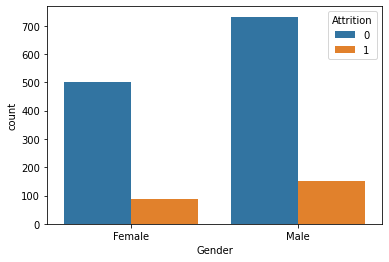

In [44]:
# plotting countplot of 'Gender'  with 'Attrition'
sns.countplot(hr['Gender'], hue=hr['Attrition'])

#  distribution of 'Attrition' rate yes in female & male have same
#

In [ ]:
sns.scatterplot('HourlyRate','JobSatisfaction', data= hr, hue= 'Attrition')

In [182]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [47]:
#  change some categorical into integer value

hr['Gender'] = hr['Gender'].map({'Female':0, 'Male':1})
hr['BusinessTravel'] = hr['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1})
hr['MaritalStatus']= hr['MaritalStatus'].map({'Divorced':0, 'Single':3, 'Married':2})
hr['OverTime'] = hr['OverTime'].map({'No':0, 'Yes':1})

PLOTTING DISTRIBUTION PLOT OVER CONTINUOUS FEATURE

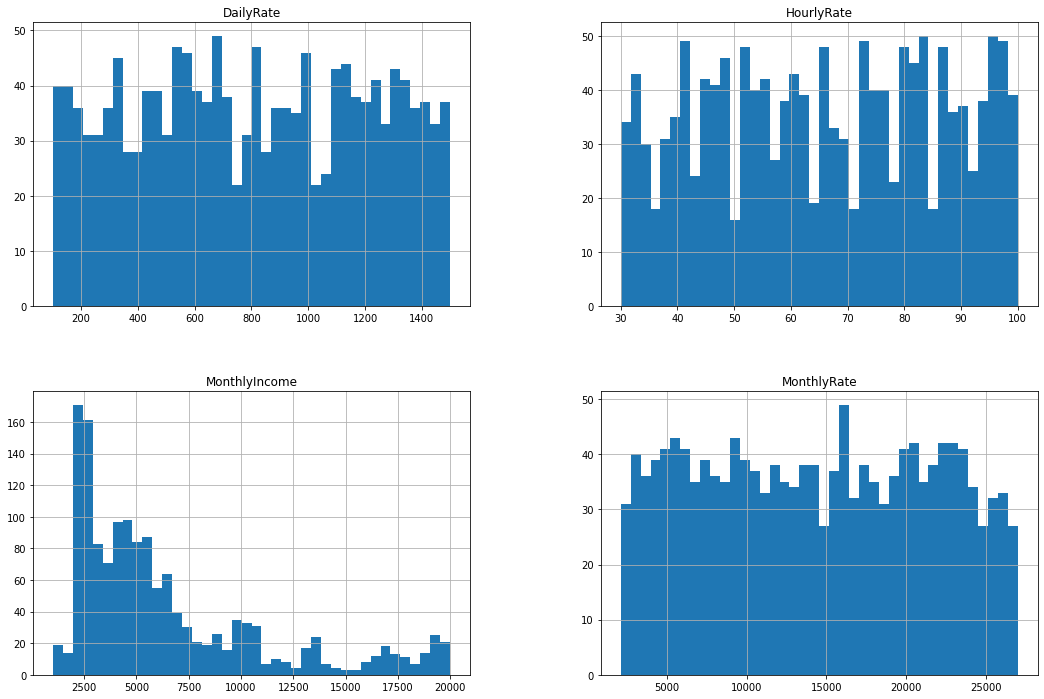

In [48]:
# plotting histogram of continuous features

hr[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']].hist(bins=40, figsize=(18,12))
plt.show()

# 

In [217]:
# based on EDA , drop the features because these are not important for predict the target_variable, 
#  some highly correlated with  each other, some contain only one value
hr = hr.drop(['EmployeeCount','EmployeeNumber','YearsInCurrentRole','StockOptionLevel','StandardHours',
              'Over18','BusinessTravel'], axis=1)

In [ ]:
# in above distribution plot no skewness show
# 

In [49]:
hr['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [218]:
hr.sample(5)

Age  Attrition  DailyRate              Department  DistanceFromHome  \
165    50          0       1452  Research & Development                11   
1157   35          0        208  Research & Development                 8   
704    35          0        882                   Sales                 3   
46     34          0       1065                   Sales                23   
1399   43          0        574  Research & Development                11   

      Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
165           3  Life Sciences                        3       0          53   
1157          4  Life Sciences                        3       0          52   
704           4  Life Sciences                        4       1          92   
46            4      Marketing                        2       1          72   
1399          3  Life Sciences                        1       1          30   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
165                3         5                    Manager                2   
1157               3         2  Healthcare Representative                3   
704                3         3            Sales Executive                4   
46                 3         2            Sales Executive                3   
1399               3         3  Healthcare Representative                3   

      MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
165               3          19926        17053                   3         0   
1157              2           4148        12250                   1         0   
704               0           7823         6812                   6         0   
46                3           4568        10034                   0         0   
1399              2           7510        16873                   1         0   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
165                  15                  3                         2   
1157                 12                  3                         4   
704                  13                  3                         2   
46                   20                  4                         3   
1399                 17                  3                         2   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
165                  21                      5                3   
1157                 15                      5                3   
704                  12                      2                3   
46                   10                      2                3   
1399                 10                      1                3   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
165                5                        4                     4  
1157              14                        2                     9  
704               10                        0                     8  
46                 9                        8                     7  
1399              10                        0                     9

In [ ]:
# TREATING SKEWNESS     OVER  CONTINUOUS FEATURES

In [50]:
x= hr[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']]

x.skew()

#  have no skewness in this dataset except 'Monthlyincome'

Age              0.413286
DailyRate       -0.003519
HourlyRate      -0.032311
MonthlyIncome    1.369817
MonthlyRate      0.018578
dtype: float64

In [51]:
#  removing skewness
for index in x.skew().index:
    if x.skew().loc[index]> 0.6:
        x[index]= np.log1p(x[index])

In [52]:
x.skew()

Age              0.413286
DailyRate       -0.003519
HourlyRate      -0.032311
MonthlyIncome    0.286448
MonthlyRate      0.018578
dtype: float64

TREATING OUTLIERS

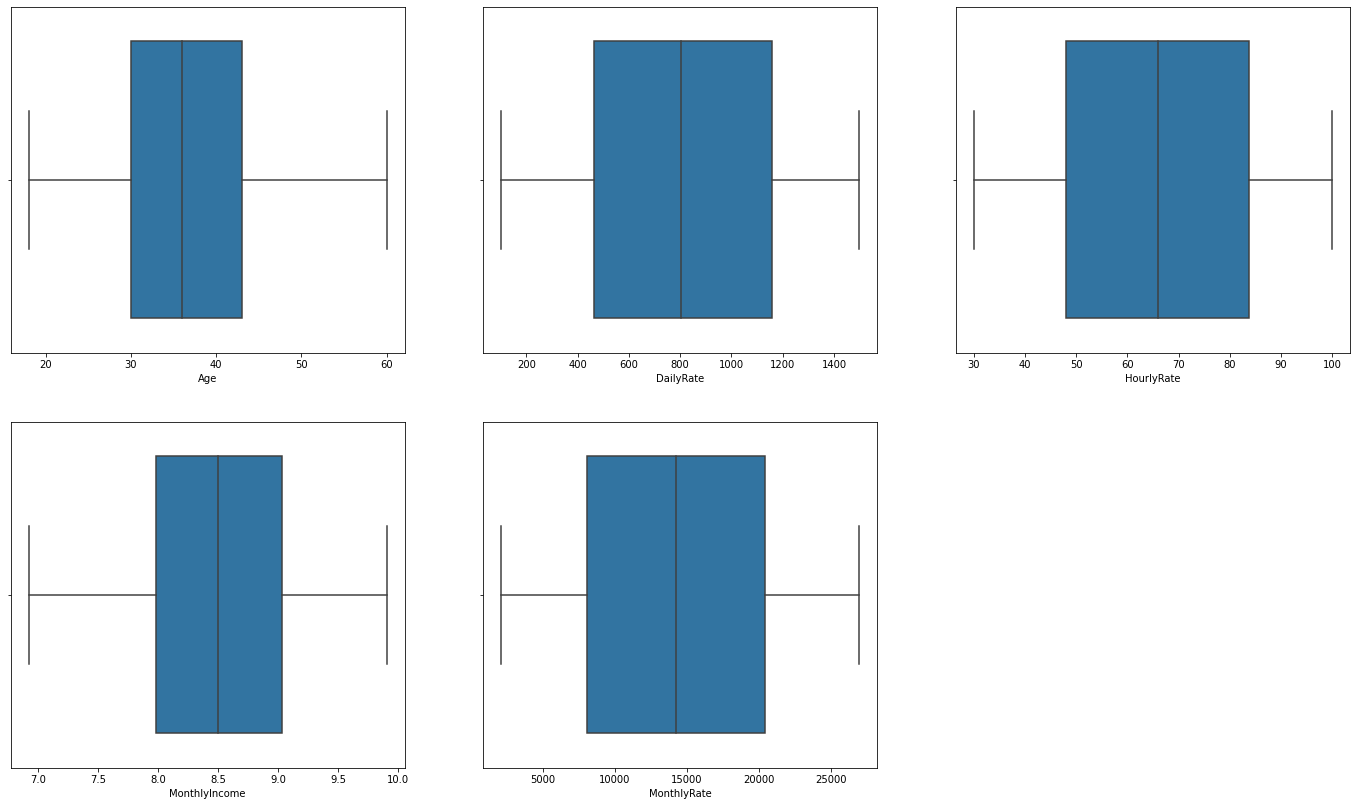

In [53]:
# plotting boxplot to check outliers        
                                 # treating oultiers over continuous features
plt.figure(figsize=(24,14))
p= 1
for col in x:
    if p<=6:                                      
        ax=plt.subplot(2,3,p)                          
        sns.boxplot(x[col])
    p+=1                                   # two features have some outliers
plt.show()

In [55]:
from scipy.stats import zscore                    # TREAT OUTLIERS OVER CONTINUOUS INPUT_FEATURE

(np.abs(zscore(x))<3).all()

# no outliers have found in this dataset

Age              True
DailyRate        True
HourlyRate       True
MonthlyIncome    True
MonthlyRate      True
dtype: bool

In [56]:
hr.head()

Age  Attrition  BusinessTravel  DailyRate              Department  \
0   41          1             0.0       1102                   Sales   
1   49          0             1.0        279  Research & Development   
2   37          1             0.0       1373  Research & Development   
3   33          0             1.0       1392  Research & Development   
4   27          0             0.0        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

                 JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0        Sales Executive                4              3           5993   
1     Research Scientist                2              2           5130   
2  Laboratory Technician                3              3           2090   
3     Research Scientist                3              2           2909   
4  Laboratory Technician                2              2           3468   

   MonthlyRate  NumCompaniesWorked Over18  OverTime  PercentSalaryHike  \
0        19479                   8      Y         1                 11   
1        24907                   1      Y         0                 23   
2         2396                   6      Y         1                 15   
3        23159                   1      Y         1                 11   
4        16632                   9      Y         0                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [57]:
#

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
d2=le.fit_transform(hr['Department']) # label encoder convert categorical
#                                                                  value into numeric value
hr['Department'] = d2

In [58]:

x= pd.get_dummies(hr)  

In [61]:
x.head(3)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1             0.0       1102           2                 1   
1   49          0             1.0        279           1                 8   
2   37          1             0.0       1373           1                 2   

   Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  \
0          2              1               1                        2       0   
1          1              1               2                        3       1   
2          2              1               4                        4       1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MaritalStatus  \
0          94               3         2                4              3   
1          61               2         2                2              2   
2          92               2         1                3              3   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                        0                     5   
1                        1                     7   
2                        0                     0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   

   EducationField_Technical Degree  JobRole_Healthcare Representative  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   

   JobRole_Sales Representative  Over18_Y  
0                             0         1  
1            

In [60]:

#  target_features
y= x.Attrition

In [72]:
X= x.drop('Attrition', axis=1)

In [73]:

# make sure to multicollinearity is or not, use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


features= X.columns
vif_value= [vif(X.values, i) for i in range(len(X.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #
#


features  vif_value
0                                 Age   2.067708
1                      BusinessTravel   1.018060
2                           DailyRate   1.034989
3                          Department  11.160538
4                    DistanceFromHome   1.022070
5                           Education   1.083131
6                       EmployeeCount   0.000000
7                      EmployeeNumber   1.034479
8             EnvironmentSatisfaction   1.029935
9                              Gender   1.030894
10                         HourlyRate   1.027185
11                     JobInvolvement   1.028396
12                           JobLevel  14.134284
13                    JobSatisfaction   1.025659
14                      MaritalStatus   1.653409
15                      MonthlyIncome  18.090939
16                        MonthlyRate   1.020482
17                 NumCompaniesWorked   1.279289
18                           OverTime   1.033805
19                  PercentSalaryHike   2.561055
20                  PerformanceRating   2.549789
21           RelationshipSatisfaction   1.029456
22                      StandardHours   0.000000
23                   StockOptionLevel   1.657365
24                  TotalWorkingYears   4.992566
25              TrainingTimesLastYear   1.034359
26                    WorkLifeBalance   1.027946
27                     YearsAtCompany   4.714132
28                 YearsInCurrentRole   2.783796
29            YearsSinceLastPromotion   1.705827
30               YearsWithCurrManager   2.842394
31     EducationField_Human Resources        inf
32       EducationField_Life Sciences        inf
33           EducationField_Marketing        inf
34             EducationField_Medical        inf
35               EducationField_Other        inf
36    EducationField_Technical Degree        inf
37  JobRole_Healthcare Representative        inf
38            JobRole_Human Resources        inf
39      JobRole_Laboratory Technician        inf
40                    JobRole_Manager        inf
41     JobRole_Manufacturing Director        inf
42          JobRole_Research Director        inf
43         JobRole_Research Scientist        inf
44            JobRole_Sales Executive        inf
45       JobRole_Sales Representative        inf
46                           Over18_Y   0.000000

In [75]:
# these features are multicollinearity
X = X.drop(['StandardHours','StockOptionLevel','Over18_Y','YearsInCurrentRole'], axis=1)

# these features are not important to predicting 'Attrition' so  removed it
# 'StandardHours', 'Over18_Y' these feature are only one value contain so it is no any importance in dataset , 
#            keep it or removed it don't matter
# 'StockOptionLevel', 'YearsInCurrentRole'  zero importance of this features in dataset 

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [77]:
# SCALING THE DATASET 

sc= StandardScaler()
scaled= sc.fit_transform(X)

In [78]:
# MAKE FUNCTION FOR finding BEST RANDOM_STATE
#  IN TRAINING PROCESS           # finding best random_state

def max_score(clf,scaled,y):
    maxf= 0
    rs= 0
    for r_state in range(50,150):
        x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.30,stratify=y)
#        rf = RandomForestClassifier()
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum accuracy_score is at random state :",rs," and it is :",maxf)


LET'S USE LOGISTIC_REGRESSION

In [79]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

max_score(lr,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.8752834467120182
maximum accuracy_score is at random state : 52  and it is : 0.8843537414965986
maximum accuracy_score is at random state : 53  and it is : 0.8956916099773242


In [81]:

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 53,test_size=0.30,stratify=y)
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)
print('accuracy_score=', accuracy_score(y_test,y_pred))
print('classification_report=\n', classification_report(y_test,y_pred))
print('confusion_matrix=\n', confusion_matrix(y_test,y_pred))

accuracy_score= 0.8956916099773242
classification_report=
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       370
           1       0.79      0.48      0.60        71

    accuracy                           0.90       441
   macro avg       0.85      0.73      0.77       441
weighted avg       0.89      0.90      0.88       441

confusion_matrix=
 [[361   9]
 [ 37  34]]


**SVM Classification**

In [82]:
from sklearn.svm import SVC
sv = SVC()

max_score(sv ,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.8571428571428571
maximum accuracy_score is at random state : 51  and it is : 0.8639455782312925
maximum accuracy_score is at random state : 55  and it is : 0.8662131519274376
maximum accuracy_score is at random state : 59  and it is : 0.8684807256235828
maximum accuracy_score is at random state : 72  and it is : 0.873015873015873
maximum accuracy_score is at random state : 76  and it is : 0.8775510204081632


In [83]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 76,test_size=0.30,stratify=y)
sv.fit(x_train,y_train)

y_pred= sv.predict(x_test)
print('accuracy_score with SVC=', accuracy_score(y_test,y_pred))
print('classification_report=\n', classification_report(y_test,y_pred))
print('confusion_matrix=\n', confusion_matrix(y_test,y_pred))

accuracy_score with SVC= 0.8775510204081632
classification_report=
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       370
           1       0.95      0.25      0.40        71

    accuracy                           0.88       441
   macro avg       0.91      0.63      0.67       441
weighted avg       0.89      0.88      0.85       441

confusion_matrix=
 [[369   1]
 [ 53  18]]


**RANDOMFOREST_CLASSIFIER**

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

max_score(rf,X,y)

maximum accuracy_score is at random state : 50  and it is : 0.8571428571428571
maximum accuracy_score is at random state : 59  and it is : 0.8662131519274376
maximum accuracy_score is at random state : 69  and it is : 0.8707482993197279


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state =69 ,test_size=0.30,stratify=y)
rf.fit(x_train,y_train)

y_pred= rf.predict(x_test)
print('accuracy_score with RandomForestClassifier=', accuracy_score(y_test,y_pred))
print('classification_report=\n', classification_report(y_test,y_pred))
print('confusion_matrix=\n', confusion_matrix(y_test,y_pred))

accuracy_score with RandomForestClassifier= 1.0
classification_report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00        71

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441

confusion_matrix=
 [[370   0]
 [  0  71]]


**DECICION-TREE_CLASSIFICATION**

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

max_score(dt,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.7755102040816326
maximum accuracy_score is at random state : 51  and it is : 0.7891156462585034
maximum accuracy_score is at random state : 57  and it is : 0.8027210884353742
maximum accuracy_score is at random state : 81  and it is : 0.8049886621315193
maximum accuracy_score is at random state : 89  and it is : 0.8208616780045351


In [88]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 89,test_size=0.30,stratify=y)
dt.fit(x_train,y_train)

y_pred= dt.predict(x_test)
print('accuracy_score with DecisionTreeClassifier=', accuracy_score(y_test,y_pred))
print('classification_report=\n', classification_report(y_test,y_pred))
print('confusion_matrix=\n', confusion_matrix(y_test,y_pred))

accuracy_score with DecisionTreeClassifier= 0.8072562358276644
classification_report=
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       370
           1       0.41      0.42      0.41        71

    accuracy                           0.81       441
   macro avg       0.65      0.65      0.65       441
weighted avg       0.81      0.81      0.81       441

confusion_matrix=
 [[326  44]
 [ 41  30]]


**ADABOOST_CLASSIFICATION**

In [89]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

max_score(ad,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.8775510204081632
maximum accuracy_score is at random state : 55  and it is : 0.8820861678004536
maximum accuracy_score is at random state : 60  and it is : 0.8843537414965986
maximum accuracy_score is at random state : 64  and it is : 0.8866213151927438
maximum accuracy_score is at random state : 78  and it is : 0.891156462585034
maximum accuracy_score is at random state : 123  and it is : 0.9024943310657596


In [90]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state =123 ,test_size=0.30,stratify=y)

ad.fit(x_train,y_train)
y_pred= ad.predict(x_test)
print('accuracy_score with AdaBoostClassifier=', accuracy_score(y_test,y_pred))
print('classification_report=\n', classification_report(y_test,y_pred))
print('confusion_matrix=\n', confusion_matrix(y_test,y_pred))

accuracy_score with AdaBoostClassifier= 0.9024943310657596
classification_report=
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       370
           1       0.83      0.49      0.62        71

    accuracy                           0.90       441
   macro avg       0.87      0.74      0.78       441
weighted avg       0.90      0.90      0.89       441

confusion_matrix=
 [[363   7]
 [ 36  35]]


**LET'S USE CROSS_VAL_SCORE**

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold= KFold(n_splits=12,shuffle=True)

In [93]:
# CROSS_VALIDATION WITH              Logistic_REGRESSION

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 53,test_size=0.30,)
print('cross_val_score with LogisticRegression',cross_val_score(lr, x_train, y_train, cv=kfold, ).mean())

cross_val_score with LogisticRegression 0.8599407204742363


In [94]:
# CROSS_VALIDATION WITH              SVC

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 76,test_size=0.30,)
print('cross_val_score with LogisticRegression',cross_val_score(sv, x_train, y_train, cv=kfold, ).mean())

cross_val_score with LogisticRegression 0.852279981760146


In [96]:
# CROSS_VALIDATION WITH              RANDOMFOREST_CLASSIFIER

x_train,x_test,y_train,y_test=train_test_split(X, y,random_state = 69,test_size=0.30,stratify=y)
print('cross_val_score with RANDOMFOREST_CLASSIFIER',cross_val_score(rf, x_train, y_train, cv=kfold, ).mean())

cross_val_score with RANDOMFOREST_CLASSIFIER 0.841609667122663


In [99]:
# CROSS_VALIDATION WITH              ADABOOST_CLASSIFICATION

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 123,test_size=0.30,stratify=y)
print('cross_val_score with LogisticRegression',cross_val_score(ad, x_train, y_train, cv=kfold, ).mean())

cross_val_score with LogisticRegression 0.8630072959416325


In [97]:
# CROSS_VALIDATION WITH              DECISIONTREE_CLASSIFICATION

dt = DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 89,test_size=0.30,stratify=y)
print('cross_val_score with GRADIENTBOOSTING_CLASSIFICATION',cross_val_score(dt , x_train, y_train, cv=kfold, ).mean())

cross_val_score with GRADIENTBOOSTING_CLASSIFICATION 0.7676698586411308


**LET'S USE SMOTE to treat imbalanced dataset**

* This dataset is imbalanced so use SMOTE to fix imbalanced problem 
  Then train & test a model

In [100]:
# over sampling with SMOTE 

from imblearn.over_sampling import SMOTE

smp= SMOTE(0.70)
Xtrain, Ytrain= smp.fit_resample(X,y)

print(y.value_counts(),)
print('\n after over_sampling \n', Ytrain.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64

 after over_sampling 
 0    1233
1     863
Name: Attrition, dtype: int64


**LET'S FIT THE MODEL AFTER BALANCED THE DATASET**

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

In [103]:
#             ADABOOST
xtrain,xtest,ytrain,ytest=train_test_split(Xtrain, Ytrain,random_state = 123,test_size=0.30, )

ad= AdaBoostClassifier()
ad.fit(xtrain, ytrain)
y_pred= ad.predict(xtest)
print('accuracy_score with AdaBoostClassifier=', accuracy_score(ytest,y_pred))
print('classification_report=\n', classification_report(ytest,y_pred))
print('confusion_matrix=\n', confusion_matrix(ytest,y_pred))
print('roc_auc_score= ',roc_auc_score(ytest, y_pred))

accuracy_score with AdaBoostClassifier= 0.8696343402225755
classification_report=
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       366
           1       0.83      0.86      0.85       263

    accuracy                           0.87       629
   macro avg       0.87      0.87      0.87       629
weighted avg       0.87      0.87      0.87       629

confusion_matrix=
 [[320  46]
 [ 36 227]]
roc_auc_score=  0.8687174053065719


**LET'S USE 'RANDOMFOREST' after balanced the dataset**

In [104]:

xtrain,xtest,ytrain,ytest=train_test_split(Xtrain, Ytrain,random_state =69 ,test_size=0.30,)
rf= RandomForestClassifier()
rf.fit(xtrain,ytrain)

y_pred= rf.predict(xtest)
print('accuracy_score with RandomForestClassifier=', accuracy_score(ytest,y_pred))
print('classification_report=\n', classification_report(ytest,y_pred))
print('confusion_matrix=\n', confusion_matrix(ytest,y_pred))
print('roc_auc_score= ',roc_auc_score(ytest, y_pred))

accuracy_score with RandomForestClassifier= 0.8934817170111288
classification_report=
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       373
           1       0.94      0.79      0.86       256

    accuracy                           0.89       629
   macro avg       0.90      0.88      0.89       629
weighted avg       0.90      0.89      0.89       629

confusion_matrix=
 [[360  13]
 [ 54 202]]
roc_auc_score=  0.877104976541555


In [105]:
# LET'S USE   GRADIENTBOOSTING_CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,random_state =61 ,test_size=0.30,)
gb.fit(x_train,y_train)

y_pred= gb.predict(x_test)
print('accuracy_score with GradientBoostingClassifier=', accuracy_score(y_test,y_pred))
print('classification_report=\n', classification_report(y_test,y_pred))
print('confusion_matrix=\n', confusion_matrix(y_test,y_pred))
print('roc_auc_score= ',roc_auc_score(y_test, y_pred))

accuracy_score with GradientBoostingClassifier= 0.8823529411764706
classification_report=
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       377
           1       0.91      0.78      0.84       252

    accuracy                           0.88       629
   macro avg       0.89      0.87      0.87       629
weighted avg       0.88      0.88      0.88       629

confusion_matrix=
 [[358  19]
 [ 55 197]]
roc_auc_score=  0.8656740768809733


In [106]:
#           LOGISTICREGRESSION

lr= LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,random_state =53  ,test_size=0.30,)
lr.fit(x_train, y_train)
pred= lr.predict(x_test)
print('accuracy_score with LogisticRegressionr=', accuracy_score(y_test,pred))
print('classification_report=\n', classification_report(y_test,pred))
print('confusion_matrix=\n', confusion_matrix(y_test,pred))

accuracy_score with LogisticRegressionr= 0.6343402225755167
classification_report=
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       396
           1       0.51      0.48      0.49       233

    accuracy                           0.63       629
   macro avg       0.60      0.60      0.60       629
weighted avg       0.63      0.63      0.63       629

confusion_matrix=
 [[288 108]
 [122 111]]


In [107]:
#          Decisiontree_Classifier  with Balanced Dataset

dtc = DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,test_size=0.30, random_state =68)
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
print('accuracy_score with DecisiontreeClassifier=', accuracy_score(y_test,pred))
print('classification_report=\n', classification_report(y_test,pred))
print('confusion_matrix=\n', confusion_matrix(y_test,pred))
print('roc_auc_score= ',roc_auc_score(y_test, y_pred))


accuracy_score with DecisiontreeClassifier= 0.766295707472178
classification_report=
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       370
           1       0.70      0.76      0.73       259

    accuracy                           0.77       629
   macro avg       0.76      0.77      0.76       629
weighted avg       0.77      0.77      0.77       629

confusion_matrix=
 [[284  86]
 [ 61 198]]
roc_auc_score=  0.4969111969111969


**let's apply CROSS VALIDATION  after balanced the dataset**


In [108]:
# CROSS_VALIDATION WITH              GRADIENTBOOSTING_CLASSIFICATION

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,random_state = 52,test_size=0.30,)
gb.fit(x_train,y_train)
print('cross_val_score with GRADIENTBOOSTING_CLASSIFICATION',cross_val_score(gb , Xtrain, Ytrain, cv=kfold, ).mean())

cross_val_score with GRADIENTBOOSTING_CLASSIFICATION 0.8912096332785988


In [109]:
# CROSS_VALIDATION WITH          DecisionTree _CLASSIFIER          

x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,random_state = 76,test_size=0.30,)
print('cross_val_score with MLP_CLASSIFICATION',cross_val_score(dtc , x_train, y_train, cv=kfold, ).mean())

cross_val_score with MLP_CLASSIFICATION 0.7628115420498468


In [111]:
# CROSS_VALIDATION WITH              RANDOMFOREST_CLASSIFIER          

x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,test_size=0.30,random_state = 51)
rf.fit(x_train,y_train)
print('cross_val_score with RANDOMFOREST_CLASSIFICATION',cross_val_score(rf , x_train, y_train, cv=kfold, ).mean())

cross_val_score with RANDOMFOREST_CLASSIFICATION 0.8793593673641654


In [112]:
# CROSS_VALIDATION WITH           ADABOOST_CLASSIFIER          

x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,test_size=0.30,random_state = 51 )
ad.fit(x_train,y_train)
print('cross_val_score with ADABOOST_CLASSIFICATION',cross_val_score(ad, x_train, y_train, cv=kfold, ).mean())

cross_val_score with ADABOOST_CLASSIFICATION 0.8704906926118442


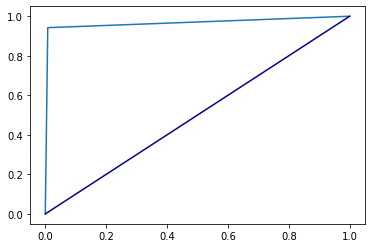

In [113]:
# ROC_CURVE WITH RANDOMFOREST_CLASSIFICATION

rf= RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred= rf.predict(x_test)

fpr,tpr,thres = roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],c='darkblue')
plt.show()

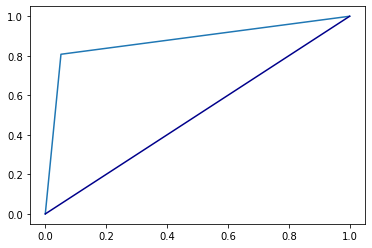

In [114]:
# ROC_CURVE WITH GRADIENTBOOSTING_CLASSIFIER

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

fpr,tpr,thres = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],c='darkblue')
plt.show()

In [ ]:
# hyperparameter tuning with 'RandomForestClassifier' , 'GradientBoostingClassifier', ;AdaBoostClassifier

In [115]:
# 
from sklearn.model_selection import GridSearchCV
rf_c= RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,random_state = 69,test_size=0.30,)

param= {'n_estimators':[100,180],'max_depth':[5,6,7,9],'min_samples_split':[2,3],'min_samples_leaf':[1,2],
        'max_features':[0.7,1.0]}
grid1= GridSearchCV(rf_c,param, cv=12,n_jobs=-1)

grid1.fit(x_train,y_train)
print(grid1.best_params_)

{'max_depth': 9, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 180}


In [116]:

RF_R= RandomForestClassifier(n_estimators=180 ,max_depth= 9,min_samples_split=3 , min_samples_leaf= 2 )

RF_R.fit(x_train,y_train)
pred= RF_R.predict(x_test)

print('accuracy_score=', accuracy_score(y_test,pred))
print('classification_report=', classification_report(y_test,pred))
print('confusion_matrix \n', confusion_matrix(y_test,pred))

accuracy_score= 0.8696343402225755
classification_report=               precision    recall  f1-score   support

           0       0.84      0.96      0.90       373
           1       0.93      0.74      0.82       256

    accuracy                           0.87       629
   macro avg       0.88      0.85      0.86       629
weighted avg       0.88      0.87      0.87       629

confusion_matrix 
 [[358  15]
 [ 67 189]]


In [117]:
#  HYPERPARAMATER TUNING GRADIENTBOOSTING
gb_c= GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(Xtrain, Ytrain,random_state = 51,test_size=0.30,)

param= {'n_estimators':[100,180],'learning_rate':[0.1,0.27,0.39],'min_samples_split':[2,3],'min_samples_leaf':[1,2],}
grid= GridSearchCV(gb_c,param, cv=kfold,n_jobs=-1)

grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.39,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 180}

In [120]:
gb_c = GradientBoostingClassifier(learning_rate=0.39,n_estimators=180,min_samples_split=3)
gb_c.fit(x_train,y_train)
pred= gb_c.predict(x_test)

print('accuracy_score=', accuracy_score(y_test,pred))
print('classification_report=', classification_report(y_test,pred))
print('confusion_matrix \n', confusion_matrix(y_test,pred))
print('roc_auc_score \n', roc_auc_score(y_test,pred))

accuracy_score= 0.9125596184419714
classification_report=               precision    recall  f1-score   support

           0       0.90      0.95      0.93       369
           1       0.93      0.86      0.89       260

    accuracy                           0.91       629
   macro avg       0.91      0.90      0.91       629
weighted avg       0.91      0.91      0.91       629

confusion_matrix 
 [[351  18]
 [ 37 223]]
roc_auc_score 
 0.9044559099437148


In [ ]:
Hyperparameter tuning with 'GradientBoosting' & 'RandomForest_Classifier' only
 because both model have given minimum 'false_negative' & maximum accuracy_score
cross_validation_score of these model maximum compare to another model
so we use GridsearchCV on this model 


In [121]:
import pickle

In [118]:
hr_analytics = 'hr_analytics.pickle'

pickle.dump(gb_c,open(hr_analytics, 'wb'))

In [119]:
model= pickle.load(open(hr_analytics, 'rb'))

In [122]:
predict= model.predict(x_test)


<AxesSubplot:xlabel='left'>

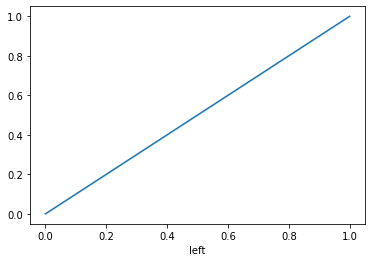

In [125]:
sns.lineplot(y_test, predict)

In [ ]:
. I did analysis the dataset first, plotting scatterplot/lineplot/countplot/barplot/ pairplot, heatmap did many things for 
    understand the insight of dataset 
. I found that some features are most important to affect 'Attrition'(yes/no) ,  means those features matters 
   whether the employees will leave the company or not
. 
.  treating skewness 
. treating outliers by zscore method
. treating multicollinearity problem by using 'variance_inflation_factor'
. train & test the model
. using cross_validation with train & test model
. hypertuning with GridsearchCV over model that performed best in train & test dataset along with cross_validation
. plot_roc_curve
. save the model



